<a href="https://colab.research.google.com/github/AshOne91/PLAYDATA-COLAB/blob/main/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀
$$y = w_0x + w_1$$
```
a : 기울기
b : 절편
x : 독립변수
y : 종속변수
```
# 손실함수  MSE
$$J(w_0, w_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - ( w_0x_i + w_1))^2$$
```
선형회귀는 손실함수의 값이 최소가 되는 방향으로 계수(가중치)를 구한다
```

In [ ]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
    21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
    22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
    27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
    36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
    40.0, 42.0, 43.0, 43.0, 43.5, 44.0],
    )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
    110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
    130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
    197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
    514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
    820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
    1000.0, 1000.0],
    )

In [ ]:
perch_length.reshape(-1,1)

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [ ]:
# 선형 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 훈련
lr.fit(perch_length.reshape(-1, 1), perch_weight)
# 예측
y_predict = lr.predict([[50]])
print(f'기울기 : {lr.coef_[0]}')
print(f'절편 : {lr.intercept_}')
print(f'예측 : {y_predict}')
lr.coef_[0]*50+lr.intercept_

기울기 : 36.938375967836976
절편 : -648.0775582457385
예측 : [1198.84124015]


np.float64(1198.84124014611)

# 학습데이터와 모델의 시각화

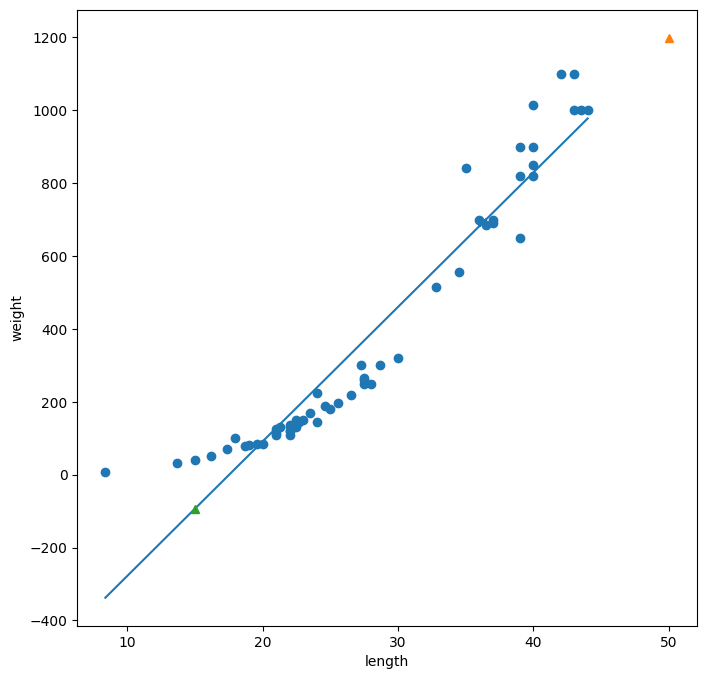

In [ ]:
import matplotlib.pyplot as plt

y_pred = lr.predict(perch_length.reshape(-1, 1))

plt.figure(figsize=(8,8))
plt.scatter(perch_length, perch_weight)
plt.plot(perch_length, y_pred)
plt.plot(50,lr.predict([[50]]),marker='^')
plt.plot(15,lr.predict([[15]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 다항 회귀
$$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_n x^n + \epsilon$$
```
기존선형회귀를 비선형 관계로 확장한 모델
x값의 거듭제곱(제곱, 세제곱, ... )을 추가해서 복잡한 패턴을 학습가능
n이 클수록 곡선이 더 유연해진다. 그러나. 과적합 위험
```

$$y = w_0 + w_1 x + w_2 x^2$$

[[  8.4   70.56]
 [ 13.7  187.69]
 [ 15.   225.  ]
 [ 16.2  262.44]
 [ 17.4  302.76]]
기울기 : [-22.4189282    1.02094922] 절편 : 131.6453196989612


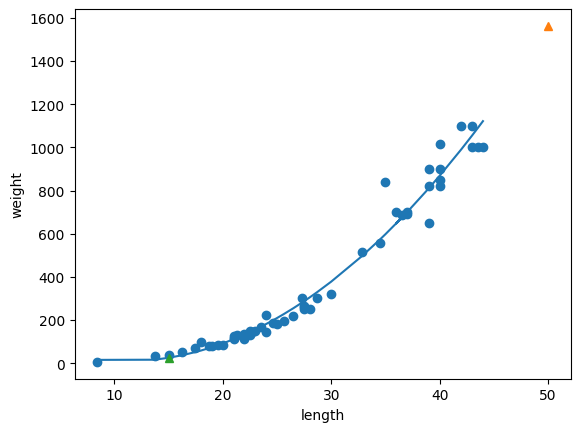

In [ ]:
import numpy as np
perch_length_poly = np.column_stack( [perch_length, perch_length**2])
# 데이터 확인
print(perch_length_poly[:5])
# 학습
lr = LinearRegression()
lr.fit(perch_length_poly, perch_weight)
print(f'기울기 : {lr.coef_} 절편 : {lr.intercept_}')
plt.scatter(perch_length, perch_weight)
plt.plot(perch_length, lr.predict(perch_length_poly))
plt.plot(50,lr.predict([[  50 ,  50**2]]),marker='^')
plt.plot(15,lr.predict([[  15 ,  15**2]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 다항 특성을 가지는 데이터를 비선형으로 만들기

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full[:5])

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


손실함수 MSE
$$J(w_0, w_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - ( w_0x_i + w_1))^2$$
릿지 - L2 규제
$$J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij})^2 + \lambda \sum_{j=1}^{p} w_j^2$$
라쏘 - L1 규제
$$J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |w_j|$$

```
        릿지  vs                      라쏘
        L2                            L1
가중치  작게(0은아님)                 일부가중치를 0으로
특징    다중공선성,모델복잡도 감소    중요변수만 선택,차원축소
언제     다중공선성이 있는경우        중요변수만 남기
공통점                 과적합 방지
```

In [ ]:
print(f'original shape : {perch_full.shape}')
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)   # degree=2
perch_poly = poly.fit_transform(perch_full)
print(f'poly shape : {perch_poly.shape}')
poly.get_feature_names_out()

original shape : (56, 3)
poly shape : (56, 9)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, LinearRegression

def get_score(degree = 2,model_name = 'lr'):
  poly = PolynomialFeatures(include_bias=False,degree=degree)
  perch_poly = poly.fit_transform(perch_full)
  train_input, test_input, train_target, test_target = train_test_split(perch_poly, perch_weight, random_state=42)

  ss = StandardScaler()
  train_scaled = ss.fit_transform(train_input)
  test_scaled = ss.transform(test_input)

  # 모델정의
  if model_name == 'lr':
    lr_d2 = LinearRegression()
  elif model_name == 'ridge':
    lr_d2 = Ridge()
  elif model_name == 'lasso':
    lr_d2 = Lasso()
  # 모델학습
  lr_d2.fit(train_scaled, train_target)
  print(f'lr : train: {lr_d2.score(train_scaled, train_target)} test: {lr_d2.score(test_scaled, test_target)}')

In [ ]:
for i in range(1,6):
  print(f'degree : {i}',end='\t')
  get_score(i)

degree : 1	lr : train: 0.9559326821885706 test: 0.8796419177546367
degree : 2	lr : train: 0.9903183436982124 test: 0.9714559911594131
degree : 3	lr : train: 0.9963872340980034 test: 0.9410534492218112
degree : 4	lr : train: 0.999528689807305 test: -6.786696959975059
degree : 5	lr : train: 1.0 test: -358.85068551974916


In [ ]:
get_score(5,'ridge')
get_score(5,'lasso')

lr : train: 0.9896101671037343 test: 0.9790693977615387
lr : train: 0.989789897208096 test: 0.9800593698421883


# 리지와 라쏘의 하이퍼 파라메터 튜닝
```
적절한 규제 강도 찾기
```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso
import pandas as pd
# 데이터 취득
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
# 데이터를 비선형
poly = PolynomialFeatures(include_bias=False,degree=5)
perch_poly = poly.fit_transform(perch_full)

# 데이터를 표준화
ss = StandardScaler()
perch_full = ss.fit_transform(perch_poly)
# 분할
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

alpha_lists = [0.001,0.01,0.1,1.0,10,100]
ridge_train_scores = []
ridge_test_scores = []

lasso_train_scores = []
lasso_test_scores = []
for alpha in alpha_lists:
  # 모델 정의
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_input, train_target)
  ridge_train_scores.append(ridge.score(train_input, train_target))
  ridge_test_scores.append(ridge.score(test_input, test_target))

  lasso = Lasso(alpha=alpha)
  lasso.fit(train_input, train_target)
  lasso_train_scores.append(lasso.score(train_input, train_target))
  lasso_test_scores.append(lasso.score(test_input, test_target))
  # 규제강도별 모델에적용해서 결정계수 값  score 을  리스트에 담기

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.337e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+03, tolerance: 5.183e

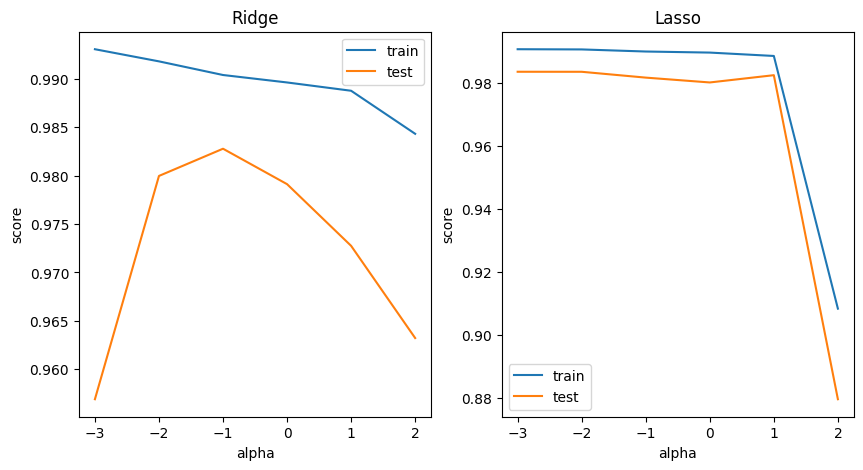

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(np.log10(alpha_lists),ridge_train_scores,label='train')
plt.plot(np.log10(alpha_lists),ridge_test_scores,label='test')
plt.legend()
plt.title("Ridge")
plt.xlabel('alpha')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(np.log10(alpha_lists),lasso_train_scores,label='train')
plt.plot(np.log10(alpha_lists),lasso_test_scores,label='test')
plt.legend()
plt.title("Lasso")
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [ ]:
# 리지 규제강도가 0.1
# 라쏘 규제강도가 10
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge = Ridge(alpha=0.1)
ridge.fit(train_input, train_target)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
# 데이터 취득

# 실전 테스트
# 데이터
```
회귀모델에 대해서는
  다중공선성 문제... 상관관계가 높은 변수들은 모델의 학습력을 떨어뜨림.. 학습을 위해서 한개는 제거
  학습데이터가 왜 독립변수라고 부르는지 생각해 볼것
특성공학
  다양한 특성의 데이터를 찾기
  날자데이터 - 년 월 일 시간, 주말여부
  연속형 숫자데이터 - > 구간을 나눠서 범주형으로
표준화
  StandardScaler  평균 0 ,표준편차 1
이상치
  IQR
결측치
  다양한 보간방법
클래스 불균형
  orversampling
    SMOTE, RandomOverSampler
  downsampling
    RandomUnderSampler
시각화를 통해 데이터의 특성을 시각적으로 파악하는것도 중요
```

# 모델
```
분류
  KNeighborsClassifier
회귀
  KNeighborsRegression
  LinearRegression, Ridge, Lasso  
```


# 과적합이 없는 성능좋은 모델을 구현하는 목적

In [ ]:
# MedInc: 중간 소득.
# HouseAge: 주택의 중간 연령.
# AveRooms: 가구당 평균 방 개수.
# AveBedrms: 가구당 평균 침실 개수.
# Population: 지역 내 총 인구 수.
# AveOccup: 가구당 평균 거주 인원.
# Latitude, Longitude: 지역의 위도와 경도.
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
print(house.keys())
print(house.target[:3])
house_df = pd.DataFrame(house.data,columns=house.feature_names)
house_df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
[4.526 3.585 3.521]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


<Axes: >

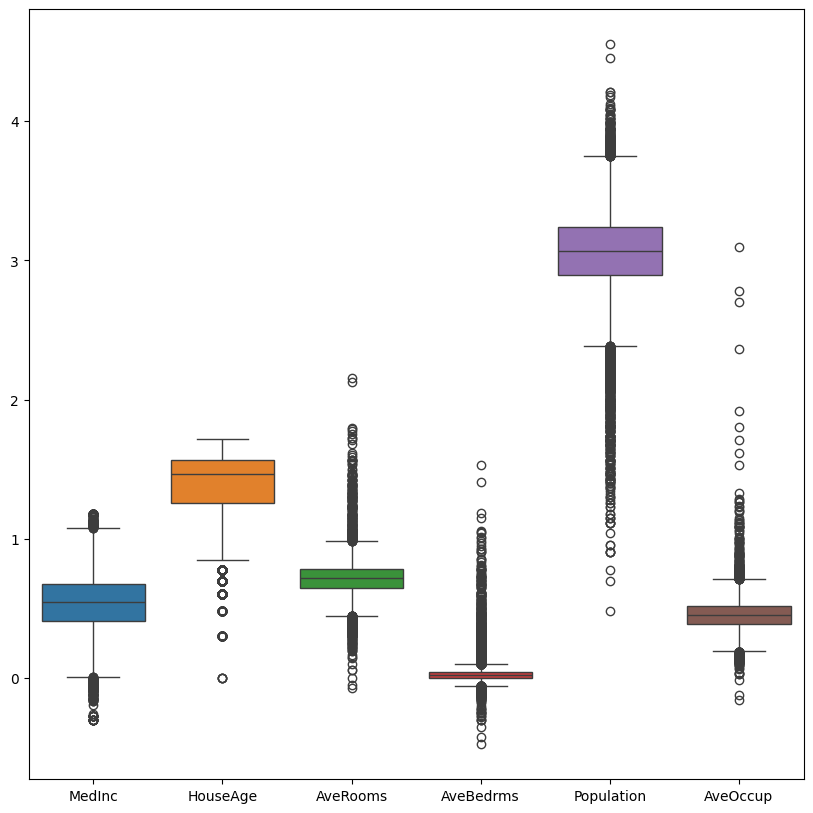

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.boxplot(data=np.log10(house_df.iloc[:,:-2]))

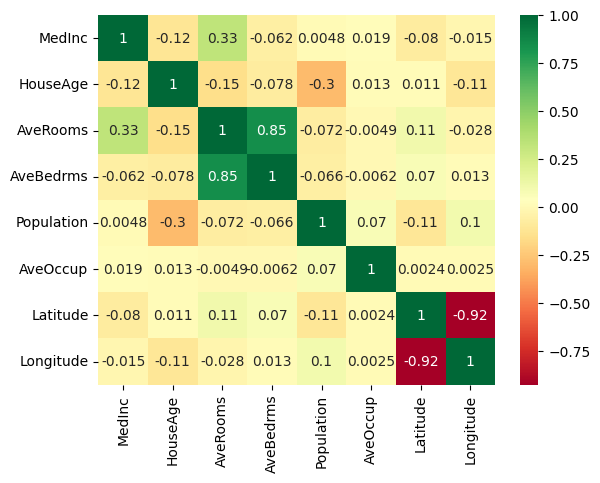

In [ ]:
# 예측문제는 다중공선성 - 상관관계가 높은 컬럼은 제외
# 상관관계 분석
corr = house_df.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
house_df.drop(['AveBedrms','Latitude','Longitude'],inplace=True,axis=1)

In [ ]:
house_df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup
0,8.3252,41.0,6.984127,322.0,2.555556
1,8.3014,21.0,6.238137,2401.0,2.109842
2,7.2574,52.0,8.288136,496.0,2.802260
3,5.6431,52.0,5.817352,558.0,2.547945
4,3.8462,52.0,6.281853,565.0,2.181467


<Axes: >

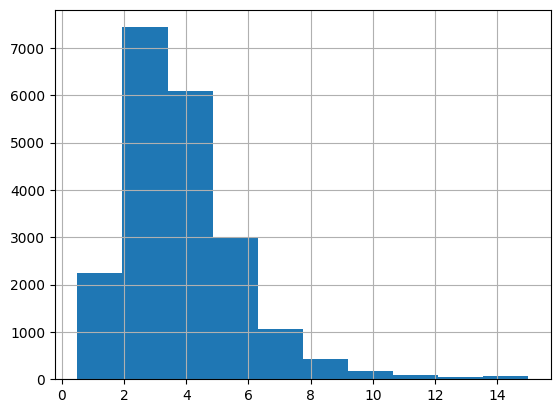

In [ ]:
house_df['MedInc'].hist()

<Axes: >

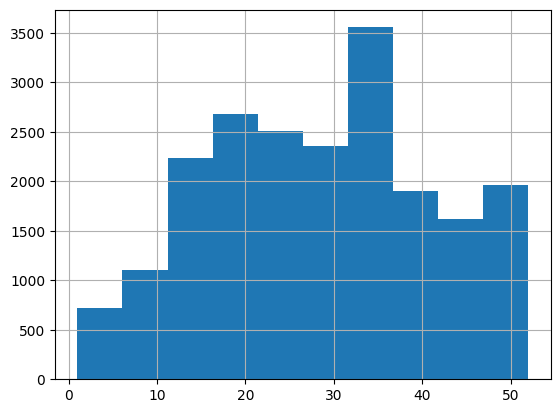

In [ ]:
house_df['HouseAge'].hist()

In [ ]:
house_df['HouseAge_group'] = pd.cut(house_df['HouseAge'],bins=[0,10,20,30,40,50,60], labels=[1,2,3,4,5,6] )

{'whiskers': [<matplotlib.lines.Line2D at 0x7cafc077f850>,
 'caps': [<matplotlib.lines.Line2D at 0x7cafc0788bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cafc077ef50>],
 'medians': [<matplotlib.lines.Line2D at 0x7cafc0789f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cafc078a7d0>],
 'means': []}

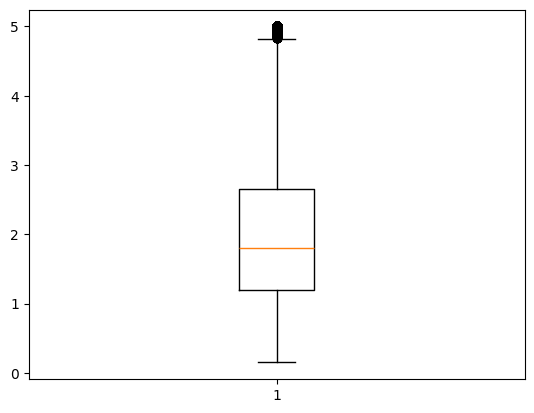

In [ ]:
# 이상치
# plt.hist(house.target)
plt.boxplot(house.target)

In [ ]:
Q1, Q3 = np.quantile(house.target,[0.25,0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.35*IQR  ,   Q3 + 1.35*IQR
print(len(house.target))
indexs = np.where((house.target > lower_bound) & (house.target < upper_bound))
house_df =  house_df.iloc[indexs]
# 정답도 indexs 에 해당하는 값만 추출
house.target = house.target[indexs]
len(house_df), len(house.target)

20640


(19461, 19461)

{'whiskers': [<matplotlib.lines.Line2D at 0x7cafc07d8c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7cafc07d9f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cafc07d81d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cafc07db710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cafc07e4250>],
 'means': []}

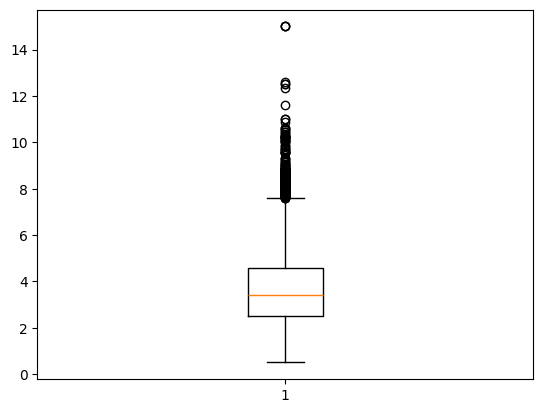

In [ ]:
plt.boxplot(house_df2['MedInc'])

In [ ]:
Q1, Q3 = np.quantile(house_df['MedInc'],[0.25,0.75])
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.35*IQR  ,   Q3 + 1.35*IQR

indexs = np.where((house_df['MedInc'] > lower_bound) & (house_df['MedInc'] < upper_bound))
house_df =  house_df.iloc[indexs]
# 정답도 indexs 에 해당하는 값만 추출
house.target = house.target[indexs]
len(house_df), len(house.target)

(19010, 19010)

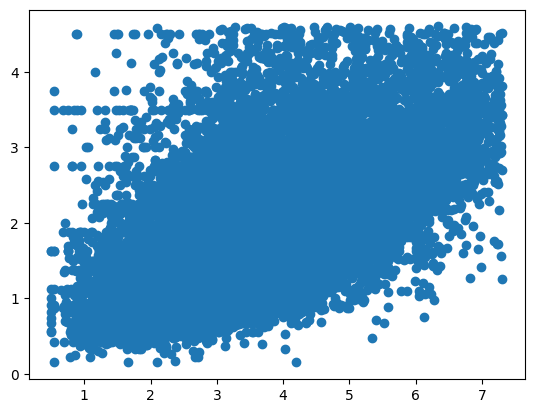

In [ ]:
# 가격 분포(정답)를 시각화  선형 or 비선형
plt.scatter(house_df['MedInc'],house.target)

In [ ]:
X = house_df.to_numpy()
y = house.target
# 선형모델  -base model
# 스케일링
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.4219722965291438
0.41079423581024743


In [ ]:
# 비선형 모델
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False,degree=4)
X_poly = poly.fit_transform(X)
X_scaled = ss.fit_transform(X_poly)
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.5901329103156147
0.10135766174052774


In [ ]:
# 규제
from sklearn.linear_model import Ridge,Lasso
ridge = Ridge()
ridge.fit(train_input, train_target)
print(ridge.score(train_input, train_target))
print(ridge.score(test_input, test_target))

0.5561235045220421
0.5140645555856835


In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_input, train_target)
print(lasso.score(train_input, train_target))
print(lasso.score(test_input, test_target))

0.5228748156022422
0.5069460396568564


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.728e+02, tolerance: 1.148e+00
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.6476187951697667
0.45453073600511373


In [ ]:
# 모든 컬럼을다 사용하고 이상치 제거 안하고
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
y = house.target
X = house.data
house_df = pd.DataFrame(house.data,columns=house.feature_names)
house_df['HouseAge_group'] = pd.cut(house_df['HouseAge'],bins=[0,10,20,30,40,50,60], labels=[1,2,3,4,5,6] )
X = house_df.to_numpy()

poly = PolynomialFeatures(include_bias=False,degree=4)
X_poly = poly.fit_transform(X)
X_scaled = ss.fit_transform(X_poly)
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)

lr = Ridge(alpha=7)
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# # 0.7055830590600454
# # 0.6839306380272545

0.7117010740272507
0.6314608479191035


베이스 모델 찾기 - KNeighborsRegressor

In [ ]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
y = house.target
X = house.data
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)
# 모델 정의
n_neighbors = list(range(1,20))
train_scores, test_scores = [],[]
for n in n_neighbors:
  kn = KNeighborsRegressor(n_neighbors=n)
  kn.fit(train_input, train_target)
  train_scores.append(kn.score(train_input, train_target))
  test_scores.append(kn.score(test_input, test_target))

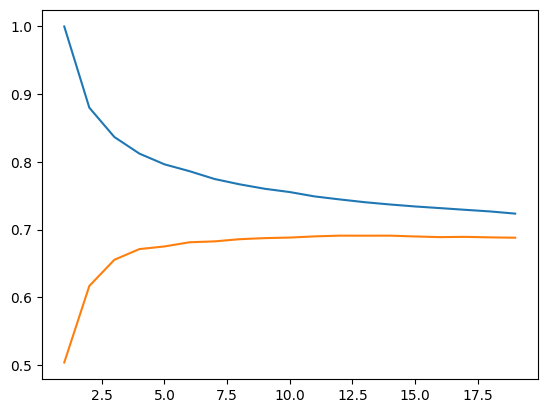

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_neighbors,train_scores)
plt.plot(n_neighbors,test_scores)

In [ ]:
kn = KNeighborsRegressor(n_neighbors=19)
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.7236669722500604
0.6880684906398564


In [ ]:
# 비선형
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False,degree=4)
X_poly = poly.fit_transform(X)
X_scaled = ss.fit_transform(X_poly)
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)
ridge = Ridge(alpha=15)
ridge.fit(train_input, train_target)
print(ridge.score(train_input, train_target))
print(ridge.score(test_input, test_target))

0.7025473844645558
0.6690900901105803


```
1 데이터 가공없이 스케일링만 맞춰서 모델을 테스트
2. 모델이 결정되면 데이터를 가공해서 성능을 향상
```

In [ ]:
import kagglehub
from glob import glob

# Download latest version
path = kagglehub.dataset_download("kukuroo3/churn-model-data-set-competition-form")

file_paths = glob(path+'/*.*')
X_df = pd.read_csv(file_paths[0])
y_df = pd.read_csv(file_paths[2])
df = pd.merge(X_df,y_df,on='CustomerId')

# 수치형 데이터추출
df = df.select_dtypes(include='number')

X = df.drop(['CustomerId','Exited'],axis=1)
y = df['Exited']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.8754616331555191
0.824


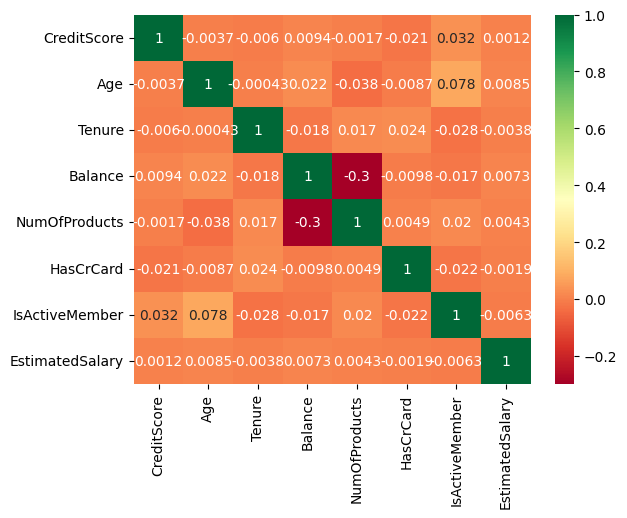

In [ ]:
corr = X.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

In [ ]:
#  NumOfProducts 제거
X = X.drop('NumOfProducts',axis=1)

In [ ]:
# Tenure: 고객이 은행을 이용한 기간
X['Tenure_group'] = pd.cut(X['Tenure'],bins=3, labels=[0,1,2] )
X = X.drop('Tenure',axis=1)

In [ ]:
# 나이를 그룹화
X['age_group'] = pd.cut(X['Age'],bins=3, labels = [0,1,2])
X = X.drop('Age',axis=1)

In [ ]:
X.head()

,CreditScore,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Tenure_group,age_group
0,791,52436.20,1,0,161051.75,2,0
1,705,166685.92,1,1,55313.51,2,0
2,543,138317.94,0,0,61843.73,1,0
3,709,0.00,0,0,109681.29,0,0
4,714,101609.01,1,1,447.73,0,0


In [ ]:
# 표준화
ss = StandardScaler()
X[['CreditScore',	'Balance','EstimatedSalary']] = ss.fit_transform(X[['CreditScore',	'Balance','EstimatedSalary']])

In [ ]:
# # 클래스 불균형
# X['Exited'] = y
# print(X['Exited'].value_counts())
# # 결측치 처리
# X.dropna(inplace=True)
# # from imblearn.over_sampling import SMOTE
# # smote = SMOTE()
# X.drop('Exited',axis=1)
# y = X['Exited']
# # X,y = smote.fit_resample(X.drop('Exited',axis=1),y)
# print(y.value_counts(), X.isna().sum())

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)
# 학습
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.8461222814936398
0.7796923076923077


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_target,kn.predict(test_input)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1276
           1       0.48      0.30      0.37       349

    accuracy                           0.78      1625
   macro avg       0.65      0.61      0.62      1625
weighted avg       0.75      0.78      0.76      1625

